In [19]:
## Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [26]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()


## Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    
    for a in images:
        try: 
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            
        except:
            print("Error loading image") 

In [27]:
## Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [28]:
## Splitting training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [29]:
## Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [31]:
## Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (5,5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation='softmax'))

In [33]:
# Compilation of the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data = (X_test, y_test))
model.save("my_model.h5")


Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 44s 1ms/step - loss: 2.2310 - accuracy: 0.4133 - val_loss: 0.9130 - val_accuracy: 0.7485
Epoch 2/15
31367/31367 [==============================] - 43s 1ms/step - loss: 1.0587 - accuracy: 0.6781 - val_loss: 0.5135 - val_accuracy: 0.8495
Epoch 3/15
31367/31367 [==============================] - 46s 1ms/step - loss: 0.6868 - accuracy: 0.7871 - val_loss: 0.2832 - val_accuracy: 0.9199
Epoch 4/15
31367/31367 [==============================] - 48s 2ms/step - loss: 0.5076 - accuracy: 0.8428 - val_loss: 0.2349 - val_accuracy: 0.9351
Epoch 5/15
31367/31367 [==============================] - 50s 2ms/step - loss: 0.4168 - accuracy: 0.8709 - val_loss: 0.1543 - val_accuracy: 0.9552
Epoch 6/15
31367/31367 [==============================] - 52s 2ms/step - loss: 0.3640 - accuracy: 0.8884 - val_loss: 0.1430 - val_accuracy: 0.9583
Epoch 7/15
31367/31367 [==============================] - 52s 2ms/st

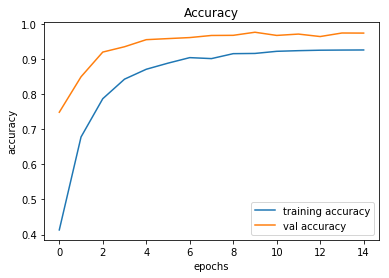

In [34]:
## Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

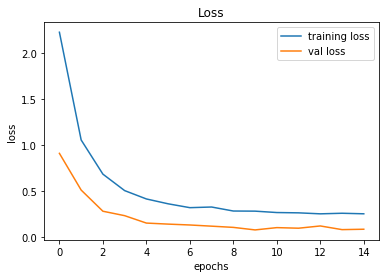

In [35]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [36]:
## Testing accuracy on test dataset

from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
    
X_test = np.array(data)

pred = model.predict_classes(X_test)

## Accuracy with the test data

from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save('traffic_classifier.h5')

0.9338083927157561
